# Network Notes

In [280]:
# good 160 unit *3 network
network_model = "func-27-1-18"
iter1 = 1100
iter2 = 3550
codec = 3200
model_type = 'functional'

output_fn_postfix1 = "output_" + str(0) + "_" + str(iter1)
output_fn_postfix1_mid = "output_" + str(1) + "_" + str(iter1)

output_fn_postfix2 = "output_" + str(0) + "_" + str(iter2)
output_fn_postfix2_mid = "output_" + str(1) + "_" + str(iter2)


from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



generating sample data of length:  200 
seed sequence for generation starts at frame index:  60  (approx.  0 : 3 ) 
seed sequence length: 200 
generate with frame sequences: 1 
Generated multiple frames in one action: (198, 13) 198 
wrote frames:  1 
Training Iteration 6311 
using full set of frames 
generating encoded output 
Training Iteration 6312 
using full set of frames 
generating encoded output 

415/603 [===================>..........] - ETA: 6s - loss: 0.2905 - model_2_loss_1: 3.0723 - model_2_loss_2: 1.1594 - generator_TD_Dense_0_loss: 0.1940 - model_1_loss: 0.5100'


In [281]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


start_iteration :  6310
num_iterations :  15000
fit_batch_size :  5
learn_next_step :  False
gen_every_nth :  10
generate_num_outputs :  2
save_model_every_nth :  10
framelen :  13
frame_seq_len :  200
overlap_sequence :  1
seed_seq_len :  200
seed_start_index :  60
seq_step :  198
test_data_fn :  ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200
frame_prop_orig_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
frame_prop_loss_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
stateful :  False
shuffle :  False
limit_frames :  0
optimizer :  {'name': 'SGD', 'params': {'lr': 0.01}}
generate_len :  200
model_filename :  out/func-27-1-18/model-6310.h5
frame_len_ms :  20


In [282]:
try:
  with open(home + "/store/c2gen/out/" + network_model + '/notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

# func-27-1-18 Notes

2018-01-07 21:17:53

Run with arguments ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200 

## Description

Removed parallel dense layer in generator. Increased the
size of the LSTMs considerably.

Restart using SGD at 1100 after blowout.

Increased learning rate at 2254

Restart at 1100 again with lr = 0.001


In [283]:
if model_type != 'functional':
  nd.model_config(network_model)

Columns: ['generator_TD_Dense_0_loss', 'model_2_loss_2', 'model_2_loss_1', 'loss']


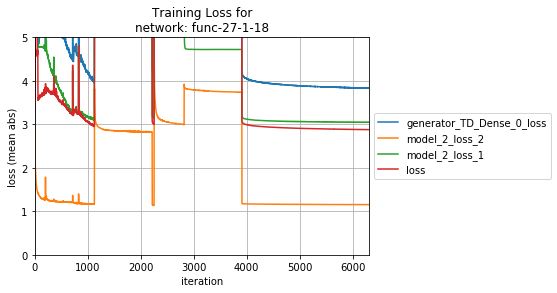

In [284]:
nd.plot_training_loss(network_model, 'mean abs', columns=['generator_TD_Dense_0_loss', 'model_2_loss_2', 'model_2_loss_1', 'loss'], weights=[20,1,1,10], start_index=0, y_max=5) 

In [285]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    rl = f.readlines()
    print(str.join("",rl[0:1]))
    print(str.join("",rl[-10:]))
    

with open(home + "/store/c2gen/out/"+network_model+"/gen_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

epoch,generator_TD_Dense_0_loss,loss,model_1_loss,model_2_loss_1,model_2_loss_2

0,0.191694431019,0.287854762172,0.50984671445,3.04679173107,1.15329777783
0,0.191487243816,0.287723167664,0.509583047275,3.0490117548,1.15384651957
0,0.191644667171,0.28783746689,0.509781035519,3.04690569116,1.15357268793
0,0.19152504391,0.28774629837,0.509621238333,3.04901058855,1.15373762027
0,0.191684502101,0.28783819921,0.509823578309,3.04721573862,1.15322151143
0,0.191489805976,0.287737578844,0.509563748516,3.04929390005,1.15396756842
0,0.191672658594,0.287853213708,0.509807992041,3.04717179018,1.15347823974
0,0.191502500529,0.287728891368,0.509581705033,3.04941204691,1.15376644204
0,0.191713124835,0.287877223358,0.509863362433,3.04693172846,1.15335414766
0,0.191552795705,0.287791282265,0.509646358676,3.04881673582,1.15393769301

6310


Latest Iteration: 6310
3200 rate codec



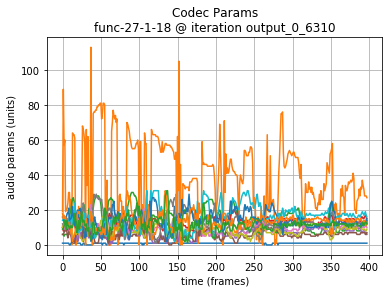

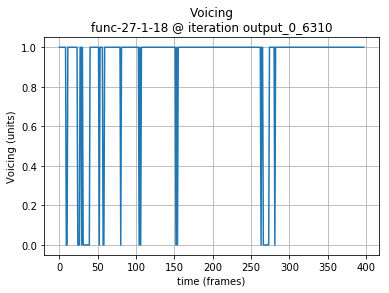

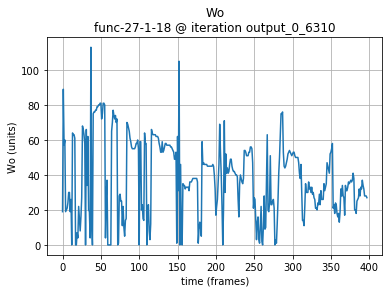

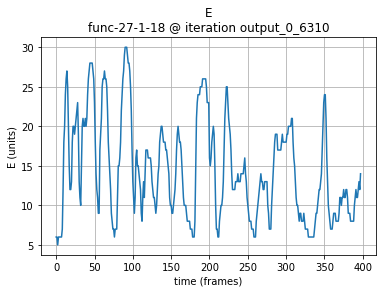

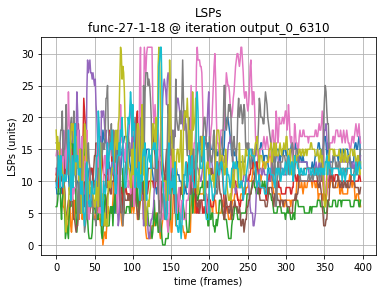

In [286]:
try:
  print("Latest Iteration:", latest_iter)
  
  output_fn_postfix = "output_" + str(0) + "_" + str(latest_iter)
  output_fn_postfix_mid = "output_" + str(1) + "_" + str(latest_iter)
  
  chart_postfix = output_fn_postfix

  nd.plot_codec_params(network_model,chart_postfix, scale_up='orig')
  nd.plot_spec_params(network_model,chart_postfix, params='Voicing')
  nd.plot_spec_params(network_model,chart_postfix, params='Wo')
  nd.plot_spec_params(network_model,chart_postfix, params='E')
  nd.plot_spec_params(network_model,chart_postfix, params='LSPs')
except FileNotFoundError:
    print("File not found")

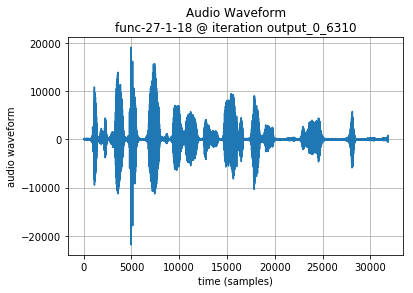

In [287]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

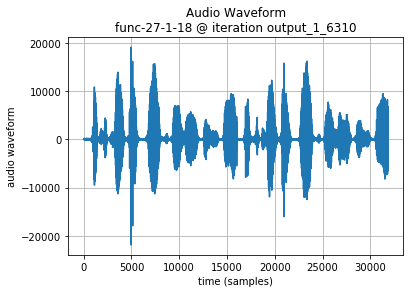

In [288]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix_mid)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

Early Iterations
===

output_0_1100
3200 rate codec



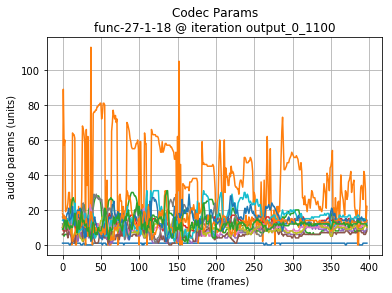

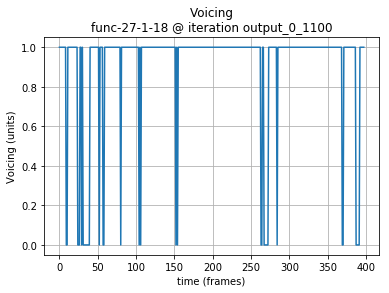

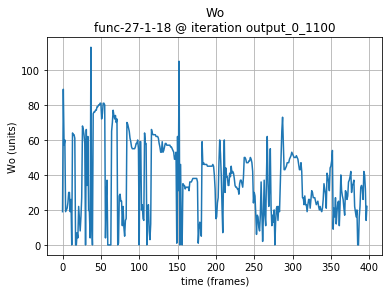

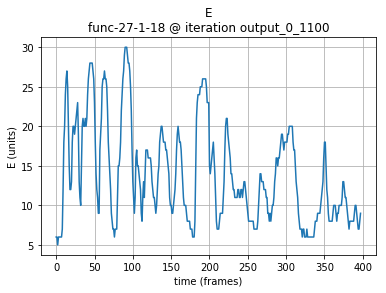

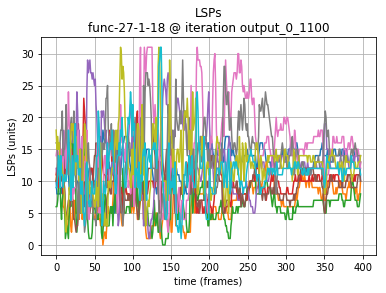

In [289]:
print(output_fn_postfix1)
nd.plot_codec_params(network_model,output_fn_postfix1, scale_up='orig')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix1, params='E')
nd.plot_spec_params(network_model,output_fn_postfix1, params='LSPs')

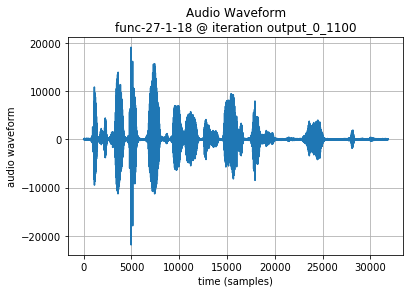

In [290]:
nd.plot_audio_waveform(network_model, output_fn_postfix1)

Listen to the WAV file

In [291]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)+codec_sub+".wav"))

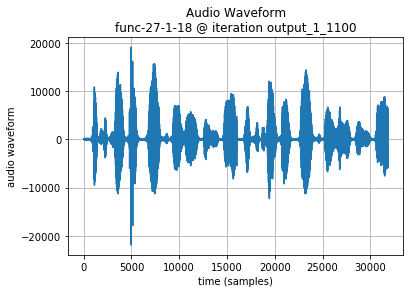

In [292]:
nd.plot_audio_waveform(network_model, output_fn_postfix1_mid)

In [293]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)+codec_sub+".wav"))

Later Iterations
===

3200 rate codec



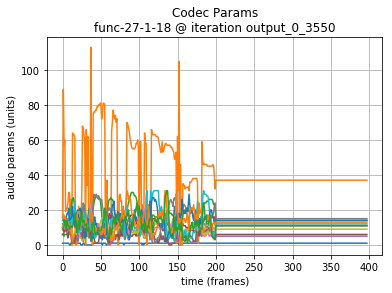

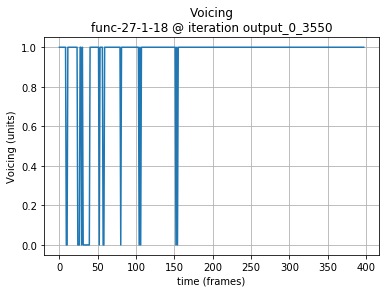

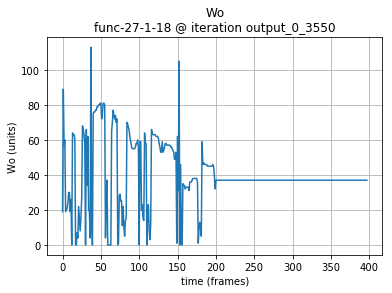

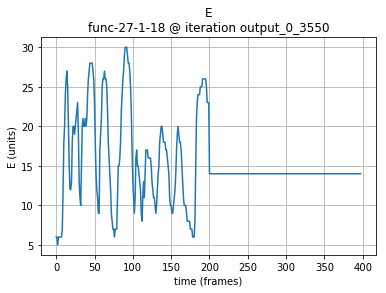

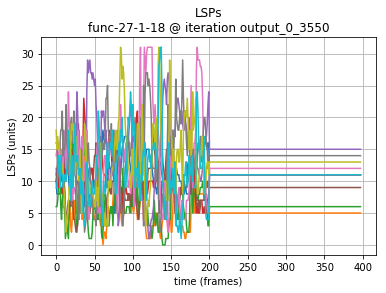

In [294]:
nd.plot_codec_params(network_model,output_fn_postfix2, scale_up=True)
nd.plot_spec_params(network_model,output_fn_postfix2, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix2, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix2, params='E')
nd.plot_spec_params(network_model,output_fn_postfix2, params='LSPs')

In [295]:
nd.plot_audio_waveform(network_model, output_fn_postfix2)

FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/func-27-1-18/out-c2cb-output_0_3550-3200.raw'

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix2)+codec_sub+".wav"))

## 